In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats

# Part 1 - Exploratory Data Analysis

In [27]:
filename = "../data/turnstile_data_master_with_weather.csv"

dtypes = {'Hour': np.int32, 'ENTRIESn_hourly': np.int32, 'EXITSn_hourly': np.int32, \
          'fog': np.int32, 'rain': np.int32, 'thunder': np.int32}
underground = pd.read_csv(filename, dtype=dtypes, index_col=0)

In [28]:
underground.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131951 entries, 0 to 131950
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UNIT             131951 non-null  object 
 1   DATEn            131951 non-null  object 
 2   TIMEn            131951 non-null  object 
 3   Hour             131951 non-null  int32  
 4   DESCn            131951 non-null  object 
 5   ENTRIESn_hourly  131951 non-null  int32  
 6   EXITSn_hourly    131951 non-null  int32  
 7   maxpressurei     131951 non-null  float64
 8   maxdewpti        131951 non-null  float64
 9   mindewpti        131951 non-null  float64
 10  minpressurei     131951 non-null  float64
 11  meandewpti       131951 non-null  float64
 12  meanpressurei    131951 non-null  float64
 13  fog              131951 non-null  int32  
 14  rain             131951 non-null  int32  
 15  meanwindspdi     131951 non-null  float64
 16  mintempi         131951 non-null  floa

In [54]:
underground

,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,R001,2011-05-01,01:00:00,1,REGULAR,0,0,30.31,42.0,35.0,...,39.0,30.27,0,0,5.0,50.0,60.0,69.0,0.00,0
1,R001,2011-05-01,05:00:00,5,REGULAR,217,553,30.31,42.0,35.0,...,39.0,30.27,0,0,5.0,50.0,60.0,69.0,0.00,0
2,R001,2011-05-01,09:00:00,9,REGULAR,890,1262,30.31,42.0,35.0,...,39.0,30.27,0,0,5.0,50.0,60.0,69.0,0.00,0
3,R001,2011-05-01,13:00:00,13,REGULAR,2451,3708,30.31,42.0,35.0,...,39.0,30.27,0,0,5.0,50.0,60.0,69.0,0.00,0
4,R001,2011-05-01,17:00:00,17,REGULAR,4400,2501,30.31,42.0,35.0,...,39.0,30.27,0,0,5.0,50.0,60.0,69.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131946,R552,2011-05-30,23:21:29,23,REGULAR,19,14,30.13,70.0,66.0,...,68.0,30.08,0,1,5.0,70.0,78.0,86.0,0.29,0
131947,R552,2011-05-30,23:23:30,23,REGULAR,158,1022,30.13,70.0,66.0,...,68.0,30.08,0,1,5.0,70.0,78.0,86.0,0.29,0
131948,R552,2011-05-30,23:28:44,23,REGULAR,54,275,30.13,70.0,66.0,...,68.0,30.08,0,1,5.0,70.0,78.0,86.0,0.29,0
131949,R552,2011-05-30,23:35:45,23,REGULAR,59,46,30.13,70.0,66.0,...,68.0,30.08,0,1,5.0,70.0,78.0,86.0,0.29,0


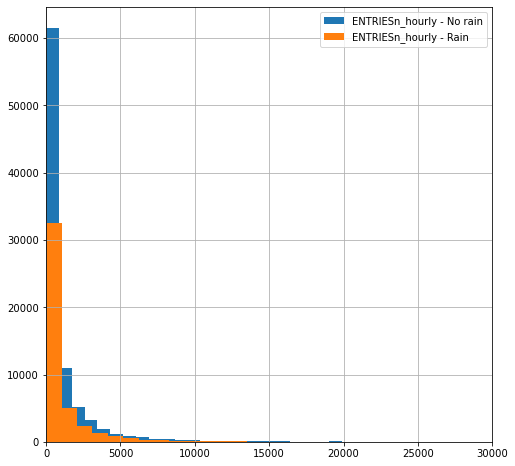

In [88]:
def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a look at the data we're hoping to analyze. 
    More specifically, let's examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly entries when raining vs. when not raining. 
    
    Here's an example on how to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    '''
    pd.Series.hist
    plt.figure(figsize=(8, 8))
    turnstile_weather[turnstile_weather.rain == 0]['ENTRIESn_hourly'].hist(bins=50)
    turnstile_weather[turnstile_weather.rain == 1]['ENTRIESn_hourly'].hist(bins=50)
    return plt


plot = entries_histogram(underground)
plt.xlim(0, 30000)
plt.legend(['ENTRIESn_hourly - No rain', 'ENTRIESn_hourly - Rain'])
plt.show()


# Part 2 - Welch's t-Test?

We can't use Welch's t-Test, as the number of entries is not normally distributed

# Part 3 - Mann-Whitney U-Test

In [50]:
def mann_whitney_plus_means(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    '''
    by_rain = turnstile_weather.groupby('rain')['ENTRIESn_hourly']
    means = by_rain.mean()
    without_rain_mean = means.loc[0]
    with_rain_mean = means.loc[1]
    U, p = scipy.stats.mannwhitneyu(by_rain.get_group(0), by_rain.get_group(1))
    return with_rain_mean, without_rain_mean, U, p


mann_whitney_plus_means(underground)

print("Conclusion: The p-statistic of the Mann-Whitney U-test is less than 0.05")

(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.024940392294493356)

# Part 4 - Ridership on Rainy vs. Nonrainy Days

In Part 3, we calculated that the p-statistic of the Mann-Whitney U-test is less than 0.05. Therefore, we can reject the null hypothesis that the two distributions have the same median.

In [52]:
by_rain = underground.groupby('rain')['ENTRIESn_hourly']
    
by_rain.get_group(0).describe()

count    87847.000000
mean      1090.278780
std       2320.004938
min          0.000000
25%         38.000000
50%        278.000000
75%       1111.000000
max      43199.000000
Name: ENTRIESn_hourly, dtype: float64

In [53]:
by_rain.get_group(1).describe()

count    44104.000000
mean      1105.446377
std       2370.527674
min          0.000000
25%         41.000000
50%        282.000000
75%       1103.250000
max      51839.000000
Name: ENTRIESn_hourly, dtype: float64

# Part 5 - Linear Regression

In this part we will:
1. Implement the compute_cost() and gradient_descent() procedures
2. Select features, in the predictions procedure, and make predictions

In [108]:
def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma


def compute_cost(features, values, theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for our thetas.
    """
    m = len(values)
    cost = (1 / (2.0 * m)) * np.square(np.dot(features, theta) - values).sum()
    return cost


def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    """
    m = len(values)
    cost_history = []

    for i in range(num_iterations):
        theta -= (alpha / m) * np.dot(np.transpose(features), np.dot(features, theta) - values)
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
        
    return theta, pd.Series(cost_history)


def plot_cost_history(alpha, cost_history):
    cost_df = pd.DataFrame({'Cost': cost_history, 'Iteration': range(len(cost_history))})
    plot = cost_df.plot(x='Iteration', y='Cost')
    plt.title("Cost history for learning rate a = {:.3f}".format(alpha))
    return plot


def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    Our prediction should have a R^2 value of 0.40 or better.
    
    We will experiment using various input features contained in the dataframe. 
    
    We won't use the EXITSn_hourly feature as an input to the linear model because we 
    cannot use it as a predictor: we cannot use exits counts as a way to predict entry counts. 
    
    If you'd like to view a plot of your cost history, uncomment the call to 
    plot_cost_history below. The slowdown from plotting is significant, so if you 
    are timing out, the first thing to do is to comment out the plot command again.
    '''
    # Select Features
    features = dataframe[['Hour', 'meanpressurei', 'meandewpti', \
                          'fog', 'precipi', 'meantempi', 'meanwindspdi']]
    
    # Add UNIT to features using dummy variables
    dummy_units = pd.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1
    num_iterations = 30

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    

    plot = plot_cost_history(alpha, cost_history)
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot

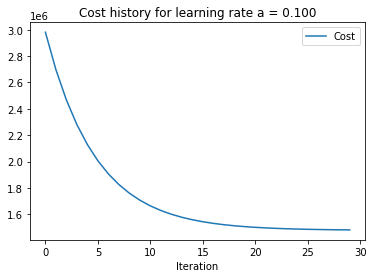

In [109]:
predictions, plot = predictions(underground)

In [106]:
def compute_r_squared(data, predictions):
    """Given two input numpy arrays, 'data', and 'predictions', return the coefficient of 
    determination, R^2, for the model that produced the predictions.
    """
    return 1 - np.square(data - predictions).sum() / np.square(data - data.mean()).sum()


In [107]:
r2 = compute_r_squared(underground['ENTRIESn_hourly'], predictions)

print("The coefficient of determination for our model is R^2 = {:.3f}".format(r2))

The coefficient of determination for our model is R^2 = 0.457


# Part 6 - Plotting Residuals

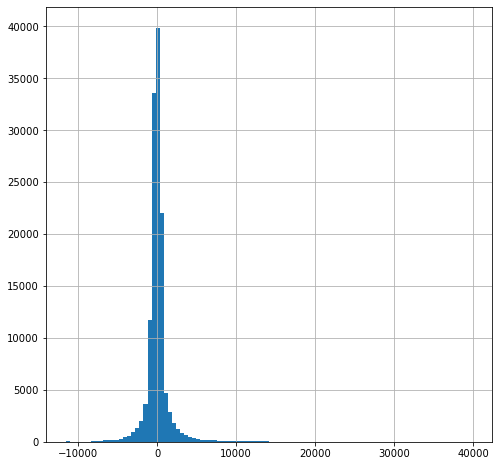

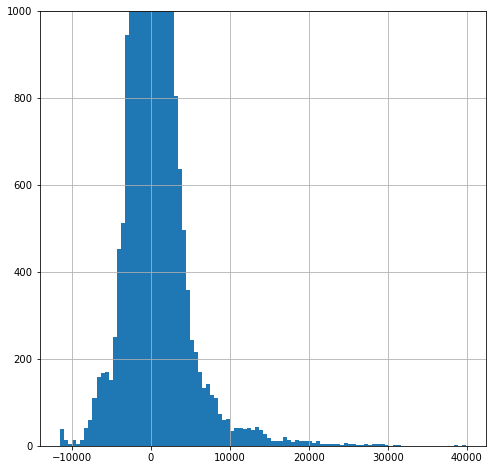

In [118]:
def plot_residuals(df, predictions):
    '''Using the same methods that we used to plot a histogram of entries
    per hour for our data, we will plot a histogram of the residuals (that is, the difference 
    between the original hourly entry data and the predicted values).
    
    Based on this residual histogram, we can get some insight into how our model performed.
    '''
    
    plt.figure(figsize=(8, 8))
    plot = (df['ENTRIESn_hourly'] - predictions).hist(bins=100)
    return plot


plot = plot_residuals(underground, predictions)
plt.show()

plot = plot_residuals(underground, predictions)
plt.ylim(0, 1000)
plt.show()

# Part 7 - Compute R^2

Already implemented in Part 5

# Part 8 - Linear Regression improved

In [155]:
def get_unit_id(unit: str) -> int:
    return int(unit[1:])


def predictions2(dataframe):
    # Select Features
    features = dataframe[['Hour', 'meanpressurei', 'meandewpti', \
                          'fog', 'precipi', 'meantempi', 'meanwindspdi']].copy()
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1
    num_iterations = 30

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions


### Conclusion

We can achieve significantly bettter predictions for certain units and significantly worse for others.

This suggests that the underlying data are not linear

In [163]:
results = dict()
grouped = underground.groupby('UNIT')

for group, df in grouped:
    predictions = predictions2(df)
    count = df['ENTRIESn_hourly'].count()
    r2 = compute_r_squared(df['ENTRIESn_hourly'], predictions)
    results[group] = (r2, count)

print("Better results:")
for key, value in results.items():
    if value[0] > 0.4:
        print("For unit '{}' r^2 = {:.3f}, count = {}".format(key, value[0], value[1]))
        
print("\nWorse results:")
for key, value in results.items():
    if value[0] < 0.05:
        print("For unit '{}' r^2 = {:.3f}, count = {}".format(key, value[0], value[1]))

Better results:
For unit 'R014' r^2 = 0.467, count = 190
For unit 'R042' r^2 = 0.466, count = 183
For unit 'R045' r^2 = 0.446, count = 186
For unit 'R079' r^2 = 0.549, count = 188
For unit 'R082' r^2 = 0.477, count = 189
For unit 'R087' r^2 = 0.426, count = 186
For unit 'R088' r^2 = 0.704, count = 184
For unit 'R108' r^2 = 0.468, count = 183
For unit 'R113' r^2 = 0.442, count = 183
For unit 'R118' r^2 = 0.647, count = 178
For unit 'R121' r^2 = 0.488, count = 182
For unit 'R131' r^2 = 0.406, count = 197
For unit 'R132' r^2 = 0.462, count = 188
For unit 'R144' r^2 = 0.498, count = 180
For unit 'R164' r^2 = 0.420, count = 199
For unit 'R166' r^2 = 0.615, count = 181
For unit 'R167' r^2 = 0.454, count = 185
For unit 'R175' r^2 = 0.424, count = 184
For unit 'R176' r^2 = 0.464, count = 194
For unit 'R177' r^2 = 0.459, count = 188
For unit 'R178' r^2 = 0.532, count = 186
For unit 'R180' r^2 = 0.411, count = 182
For unit 'R187' r^2 = 0.696, count = 183
For unit 'R190' r^2 = 0.560, count = 181


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
